In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Mexico'

link = 'https://rally-base.com/2023/rally-guanajuato-mexico-2023/?ssId='
startat, no_ss=7376, int(23) # starting number of url, count of Special Stages
canceled = [15]

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Tänak Ott,RC1,00:00:58.0,69.52 0.00,00:00:00.0 00:00:00.0,1,Mexico,1
2,2,69,Rovanperä,RC1,00:00:58.8,68.57 0.71,00:00:00.8 00:00:00.8,1,Mexico,2
3,3,4,Lappi Esa,RC1,00:00:59.3,67.99 1.16,00:00:01.3 00:00:00.5,1,Mexico,3
4,4,33,Evans Elf,RC1,00:00:59.5,67.76 1.34,00:00:01.5 00:00:00.2,1,Mexico,4
5,5,11,Neuville,RC1,00:00:59.7,67.54 1.52,00:00:01.7 00:00:00.2,1,Mexico,5
...,...,...,...,...,...,...,...,...,...,...
24,24,37,Bailey Ja,RC3,00:06:46.7,84.87 9.59,00:01:31.9 00:00:08.0,23,Mexico,24
25,25,36,Mauro Ale,RC2,00:06:50.2,84.14 9.95,00:01:35.4 00:00:03.5,23,Mexico,25
26,26,39,Urióstegui,RC5,00:06:57.2,82.74 10.68,00:01:42.4 00:00:07.0,23,Mexico,26
27,27,38,Spitalier,RC5,00:07:04.6,81.29 11.46,00:01:49.8 00:00:07.4,23,Mexico,27


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                           Pos.                                              \
ss                            1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                      
4   Lappi  Esa RC1   Mexico    3   2   1   2   1   1   2   1   1   7  30  30   
6   Sordo  Dan RC1   Mexico    6   6   3   4   3   4  13   5   5   1   6   5   
7   Loubet  P. RC1   Mexico    8   6  30  28  26  26  26  25  25  23   8   7   
8   Tänak  Ott RC1   Mexico    1   1  29  24  22   7  11   8  10   2   4   6   
9   Serderidis RC1   Mexico   19  17  30  28  26  26  26  25  25  23   9   9   
11  Neuville   RC1   Mexico    5   5   5   7   5   5   4   2   2   3   3   1   
17  Ogier  S.  RC1   Mexico    6   4   2   1   2   2   1   3   4   3   1   3   
18  Katsuta  T RC1   Mexico    9   8   7   6  26  26  26  25  25  23   7   8   
20  Greensmith RC2   Mexico   12  12   8  10   9   8   7   7   9  10   9   9   
21  Solberg  O RC2   Mexico   16  13   8  11   7   9   6  19   3   8   9   9   
22  Fourmaux   RC2   Mexico   20  15   8   9   8  10   9   9   8   9   9   9   
23  Gryazin  N RC2   Mexico   11  11   8  30  29   -   -   -   -   -   -   -   
24  Lindholm   RC2   Mexico   10  10   8   8  10  11   8  11  12  11   9   9   
25  Kajetanowi RC2   Mexico   13  14   8  12  11  12  10  10  11  12   9   9   
26  Prokop  Ma RC2   Mexico   21  19   8  14  13  14  14  13  13  13   9   9   
27  Chwist  Da RC2   Mexico   25  24   8  21  19  19  21  21  19  16   9   9   
28  Castro  Ed RC2   Mexico   23  18   8  16  14  15  18  28  28  26   9   9   
29  Martínez   RC2   Mexico   14  16   8  13  12  13  12  12  15  26   9   9   
30  Dominguez  RC3   Mexico   24  25   8  20  18  20  19  17  16  14   9   9   
31  Cordero  R RC2   Mexico   22  23   8  18  17  16  15  16  17  22   9   9   
32  Granados   RC2   Mexico   18  22   8  16  30  29  29  29  29  29   9   9   
33  Evans  Elf RC1   Mexico    4   8   4   3   4   3   3   4   6   5   2   2   
34  Salas  Car RC2   Mexico   16  19   8  15  15  17  16  15  14  15   9   9   
35  Coyne  Joh RC2   Mexico   26  27   8  23  20  21  20  20  23  20   9   9   
36  Mauro  Ale RC2   Mexico   14  21   8  19  16  18  17  14  24  17   9   9   
37  Bailey  Ja RC3   Mexico   28  26   8  22  21  22  22  18  18  28   9   9   
38  Spitalier  RC5   Mexico   27  29   8  25  23  23  23  22  20  19   9   9   
39  Urióstegui RC5   Mexico   29  30   8  31  31  30  30  30  30  30   9   9   
41  Maggio  Ra RC5   Mexico   31  31   8  27  25  25  25  24  22  21   9   9   
42  Retama  Em RC5   Mexico   30  28   8  26  24  24  24  23  21  18   9   9   
69  Rovanperä  RC1   Mexico    2   2   6   5   6   6   5   6   7   6   5   4   

0                                                                    
ss                           13  14  16  17  18  19  20  21  22  23  
No. Crew       Group Race                                            
4   Lappi  Esa RC1   Mexico  30  30   -   -   -   -   -   -   -   -  
6   Sordo  Dan RC1   Mexico   6   5   6   5   5   5  12   5   6   5  
7   Loubet  P. RC1   Mexico   8  12   7  29  29  28  13  12   7   8  
8   Tänak  Ott RC1   Mexico   5   4   5   4   1   1   3   6   2   2  
9   Serderidis RC1   Mexico   9  19  17  16  18  13  18  17  16  18  
11  Neuville   RC1   Mexico   1   1   2   1   3   2   1   2   1   3  
17  Ogier  S.  RC1   Mexico   2   2   1   3   8   3   8   3   4   1  
18  Katsuta  T RC1   Mexico   7  11   8   7  11   7   6  10   8   7  
20  Greensmith RC2   Mexico   9  10  10   9   9  11   9   9  10  11  
21  Solberg  O RC2   Mexico   9   3   9   8   4   8   7   6  11  15  
22  Fourmaux   RC2   Mexico   9   9  11  10  15   8  10  28  12   9  
23  Gryazin  N RC2   Mexico   -   -   -   -   -   -   -   -   -   -  
24  Lindholm   RC2   Mexico   9   8  12  11   7  10   5   8   9  10  
25  Kajetanowi RC2   Mexico   9  13  13  14  12  12  13  11  13  12  
26  Prokop  Ma RC2   Mexico   9  14  14  12  12  14  15  14  15  14  
27  Chwist  Da RC2 

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Tänak Ott,RC1,1,Mexico,1,58.0
2,69,Rovanperä,RC1,1,Mexico,2,58.8
3,4,Lappi Esa,RC1,1,Mexico,3,59.3
4,33,Evans Elf,RC1,1,Mexico,4,59.5
5,11,Neuville,RC1,1,Mexico,5,59.7
...,...,...,...,...,...,...,...
24,37,Bailey Ja,RC3,23,Mexico,24,406.7
25,36,Mauro Ale,RC2,23,Mexico,25,410.2
26,39,Urióstegui,RC5,23,Mexico,26,417.2
27,38,Spitalier,RC5,23,Mexico,27,424.6


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Mexico 1       58.0
       2       56.2
       3     1320.2
       4      507.8
       5      535.6
       6     1314.1
       7      500.8
       8      527.7
       9      195.0
       10      89.9
       11     515.6
       12     878.1
       13     743.1
       14     191.4
       16     864.8
       17     736.0
       18     193.6
       19      89.6
       20     190.9
       21    1477.7
       22     431.8
       23     314.8

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,8,Tänak Ott,RC1,1,Mexico,1,58.0,58.0
1,69,Rovanperä,RC1,1,Mexico,2,58.8,58.0
2,4,Lappi Esa,RC1,1,Mexico,3,59.3,58.0
3,33,Evans Elf,RC1,1,Mexico,4,59.5,58.0
4,11,Neuville,RC1,1,Mexico,5,59.7,58.0
...,...,...,...,...,...,...,...,...
649,37,Bailey Ja,RC3,23,Mexico,24,406.7,314.8
650,36,Mauro Ale,RC2,23,Mexico,25,410.2,314.8
651,39,Urióstegui,RC5,23,Mexico,26,417.2,314.8
652,38,Spitalier,RC5,23,Mexico,27,424.6,314.8


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Mexico,1,58.0,58.0,0.0,0.000000,01
1,69,Rovanperä,RC1,1,Mexico,2,58.8,58.0,0.8,1.379310,01
2,4,Lappi Esa,RC1,1,Mexico,3,59.3,58.0,1.3,2.241379,01
3,33,Evans Elf,RC1,1,Mexico,4,59.5,58.0,1.5,2.586207,01
4,11,Neuville,RC1,1,Mexico,5,59.7,58.0,1.7,2.931034,01
...,...,...,...,...,...,...,...,...,...,...,...
649,37,Bailey Ja,RC3,23,Mexico,24,406.7,314.8,91.9,29.193139,23
650,36,Mauro Ale,RC2,23,Mexico,25,410.2,314.8,95.4,30.304956,23
651,39,Urióstegui,RC5,23,Mexico,26,417.2,314.8,102.4,32.528590,23
652,38,Spitalier,RC5,23,Mexico,27,424.6,314.8,109.8,34.879288,23


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Mexico,1,58.0,58.0,0.0,0.000000,01
1,69,Rovanperä,RC1,1,Mexico,2,58.8,58.0,0.8,1.379310,01
2,4,Lappi Esa,RC1,1,Mexico,3,59.3,58.0,1.3,2.241379,01
3,33,Evans Elf,RC1,1,Mexico,4,59.5,58.0,1.5,2.586207,01
4,11,Neuville,RC1,1,Mexico,5,59.7,58.0,1.7,2.931034,01
...,...,...,...,...,...,...,...,...,...,...,...
630,6,Sordo Dan,RC1,23,Mexico,5,319.5,314.8,4.7,1.493011,23
631,33,Evans Elf,RC1,23,Mexico,6,320.2,314.8,5.4,1.715375,23
632,18,Katsuta T,RC1,23,Mexico,7,323.9,314.8,9.1,2.890724,23
633,7,Loubet P.,RC1,23,Mexico,8,327.0,314.8,12.2,3.875476,23


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Mexico,1,58.0,58.0,0.0,0.000000,01
1,69,Rovanperä,RC1,1,Mexico,2,58.8,58.0,0.8,1.379310,01
2,4,Lappi Esa,RC1,1,Mexico,3,59.3,58.0,1.3,2.241379,01
3,33,Evans Elf,RC1,1,Mexico,4,59.5,58.0,1.5,2.586207,01
4,11,Neuville,RC1,1,Mexico,5,59.7,58.0,1.7,2.931034,01
...,...,...,...,...,...,...,...,...,...,...,...
630,6,Sordo Dan,RC1,23,Mexico,5,319.5,314.8,4.7,1.493011,23
631,33,Evans Elf,RC1,23,Mexico,6,320.2,314.8,5.4,1.715375,23
632,18,Katsuta T,RC1,23,Mexico,7,323.9,314.8,9.1,2.890724,23
633,7,Loubet P.,RC1,23,Mexico,8,327.0,314.8,12.2,3.875476,23


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Mexico                                                        \
SS.            01   02     03     04     05     06     07     08     09   
Crew                                                                      
Evans  Elf    1.5  1.8    7.9    0.7    3.2    7.6    4.2    3.9    4.9   
Katsuta  T    2.3  1.8   20.1    5.7  600.0  600.0  600.0  600.0  600.0   
Lappi  Esa    1.3  0.9    0.0    0.4    0.0    0.0    1.9    0.0    0.0   
Loubet  P.    2.1  1.6  600.0  600.0  600.0  600.0  600.0  600.0  600.0   
Neuville      1.7  1.1    9.7    7.9    5.4    9.4    6.9    1.2    2.6   
Ogier  S.     1.8  1.0    0.6    0.0    0.6    0.8    0.0    3.1    3.5   
Rovanperä     0.8  0.9   12.7    4.6   12.8   12.4    8.0    6.8    5.5   
Serderidis    6.7  6.2  600.0  600.0  600.0  600.0  600.0  600.0  600.0   
Sordo  Dan    1.8  1.6    6.1    4.3    1.9    8.1   60.1    5.4    4.6   
Tänak  Ott    0.0  0.0  467.7  160.0  128.4   29.0   33.9   23.5    8.7   

Race                                                                       \
SS.            10     11     12     13     14     16     17     18     19   
Crew                                                                        
Evans  Elf    1.1    2.5    0.7    0.5    1.7    8.3    2.6    1.4    1.4   
Katsuta  T  600.0   21.6   36.8   29.8    5.1   31.5   20.7   11.7    2.8   
Lappi  Esa    2.2  600.0  600.0  600.0  600.0    NaN    NaN    NaN    NaN   
Loubet  P.  600.0   24.5   35.0   30.5    6.0   25.9  600.0  600.0  600.0   
Neuville      0.6    4.4    0.0    0.0    0.0    8.1    0.0    0.3    0.9   
Ogier  S.     0.6    0.0    1.4    0.1    0.2    0.0    3.1    2.3    1.0   
Rovanperä     1.9    7.2    6.7    5.8    1.4    9.0   15.9    0.1    1.6   
Serderidis  600.0   71.6  122.1  113.4   19.2  127.0  109.5   20.0    5.9   
Sordo  Dan    0.0   13.2   12.3    9.8    1.4   19.2    9.3    0.7    1.5   
Tänak  Ott    0.5    7.1   19.3    8.3    0.7   12.7    5.8    0.0    0.0   

Race                                 
SS.           20     21    22    23  
Crew                                 
Evans  Elf   0.2    0.0   3.1   5.4  
Katsuta  T   3.4   87.8  21.0   9.1  
Lappi  Esa   NaN    NaN   NaN   NaN  
Loubet  P.  12.6  109.6  18.7  12.2  
Neuville     0.0    1.7   0.0   2.3  
Ogier  S.    3.8    9.0   3.8   0.0  
Rovanperä    1.9   24.4   7.1   4.5  
Serderidis  24.0  194.8  55.5  56.4  
Sordo  Dan  10.0   29.2  10.3   4.7  
Tänak  Ott   0.6   46.5   1.5   2.1

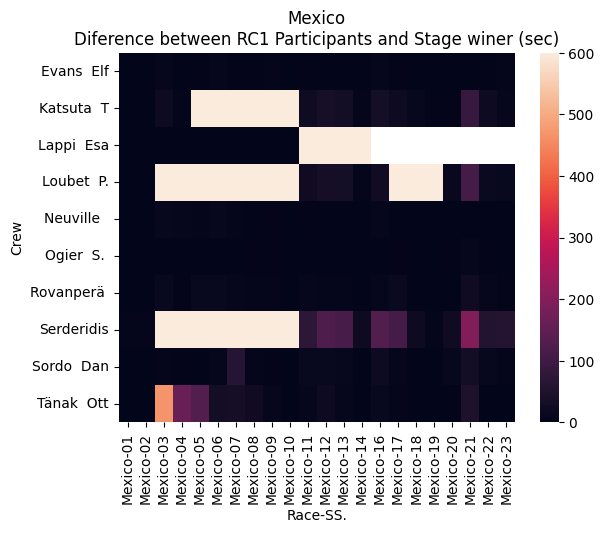

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

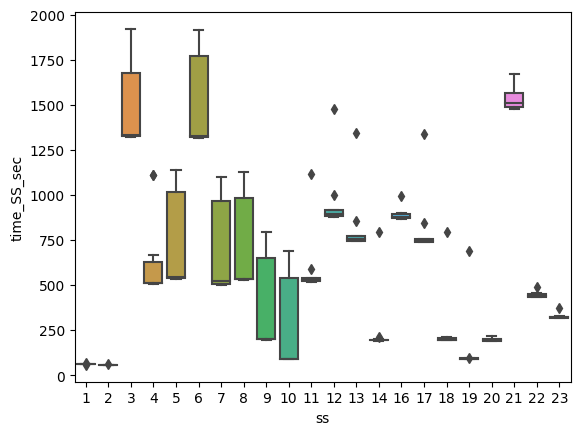

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

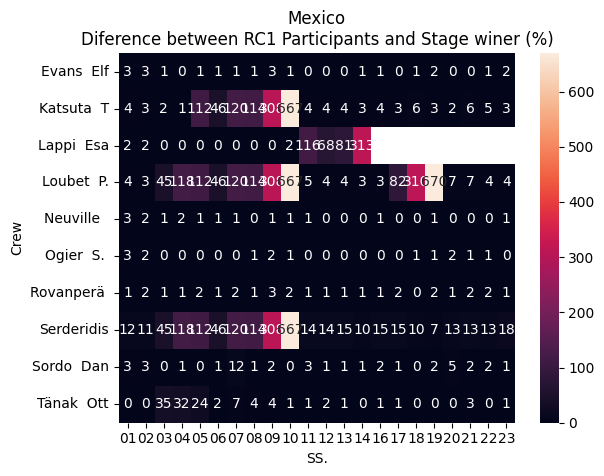

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")

In [19]:
ss_times_WRC2 = ss_times_WRC[ss_times_WRC['Crew']!= 'Serderidis']
ss_times_WRC2

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Mexico,1,58.0,58.0,0.0,0.000000,01
1,69,Rovanperä,RC1,1,Mexico,2,58.8,58.0,0.8,1.379310,01
2,4,Lappi Esa,RC1,1,Mexico,3,59.3,58.0,1.3,2.241379,01
3,33,Evans Elf,RC1,1,Mexico,4,59.5,58.0,1.5,2.586207,01
4,11,Neuville,RC1,1,Mexico,5,59.7,58.0,1.7,2.931034,01
...,...,...,...,...,...,...,...,...,...,...,...
629,69,Rovanperä,RC1,23,Mexico,4,319.3,314.8,4.5,1.429479,23
630,6,Sordo Dan,RC1,23,Mexico,5,319.5,314.8,4.7,1.493011,23
631,33,Evans Elf,RC1,23,Mexico,6,320.2,314.8,5.4,1.715375,23
632,18,Katsuta T,RC1,23,Mexico,7,323.9,314.8,9.1,2.890724,23


In [20]:
ss_times_F6 =ss_times_WRC2.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F7 = pd.pivot_table(ss_times_F6, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F7

Race       Mexico                                                        \
SS.            01   02     03     04     05     06     07     08     09   
Crew                                                                      
Evans  Elf    1.5  1.8    7.9    0.7    3.2    7.6    4.2    3.9    4.9   
Katsuta  T    2.3  1.8   20.1    5.7  600.0  600.0  600.0  600.0  600.0   
Lappi  Esa    1.3  0.9    0.0    0.4    0.0    0.0    1.9    0.0    0.0   
Loubet  P.    2.1  1.6  600.0  600.0  600.0  600.0  600.0  600.0  600.0   
Neuville      1.7  1.1    9.7    7.9    5.4    9.4    6.9    1.2    2.6   
Ogier  S.     1.8  1.0    0.6    0.0    0.6    0.8    0.0    3.1    3.5   
Rovanperä     0.8  0.9   12.7    4.6   12.8   12.4    8.0    6.8    5.5   
Sordo  Dan    1.8  1.6    6.1    4.3    1.9    8.1   60.1    5.4    4.6   
Tänak  Ott    0.0  0.0  467.7  160.0  128.4   29.0   33.9   23.5    8.7   

Race                                                                      \
SS.            10     11     12     13     14    16     17     18     19   
Crew                                                                       
Evans  Elf    1.1    2.5    0.7    0.5    1.7   8.3    2.6    1.4    1.4   
Katsuta  T  600.0   21.6   36.8   29.8    5.1  31.5   20.7   11.7    2.8   
Lappi  Esa    2.2  600.0  600.0  600.0  600.0   NaN    NaN    NaN    NaN   
Loubet  P.  600.0   24.5   35.0   30.5    6.0  25.9  600.0  600.0  600.0   
Neuville      0.6    4.4    0.0    0.0    0.0   8.1    0.0    0.3    0.9   
Ogier  S.     0.6    0.0    1.4    0.1    0.2   0.0    3.1    2.3    1.0   
Rovanperä     1.9    7.2    6.7    5.8    1.4   9.0   15.9    0.1    1.6   
Sordo  Dan    0.0   13.2   12.3    9.8    1.4  19.2    9.3    0.7    1.5   
Tänak  Ott    0.5    7.1   19.3    8.3    0.7  12.7    5.8    0.0    0.0   

Race                                 
SS.           20     21    22    23  
Crew                                 
Evans  Elf   0.2    0.0   3.1   5.4  
Katsuta  T   3.4   87.8  21.0   9.1  
Lappi  Esa   NaN    NaN   NaN   NaN  
Loubet  P.  12.6  109.6  18.7  12.2  
Neuville     0.0    1.7   0.0   2.3  
Ogier  S.    3.8    9.0   3.8   0.0  
Rovanperä    1.9   24.4   7.1   4.5  
Sordo  Dan  10.0   29.2  10.3   4.7  
Tänak  Ott   0.6   46.5   1.5   2.1

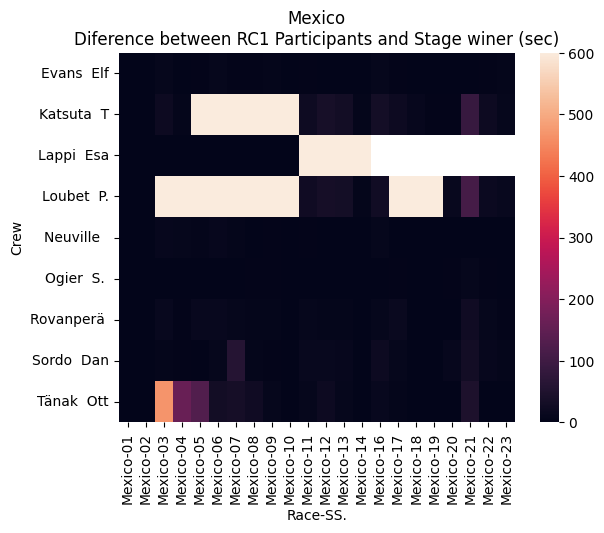

In [21]:
Heatmap_WRC2 = sns.heatmap(ss_times_F7)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_No_Serderidis.png")

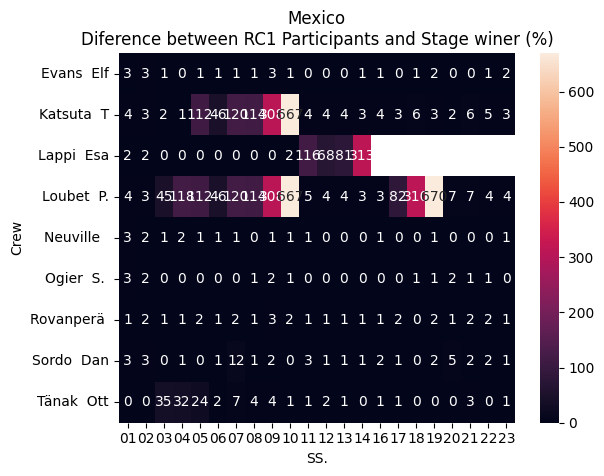

In [22]:
ss_timesb = pd.pivot_table(ss_times_WRC2, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesb, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1_No_Serderidis.jpg")